In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [2]:
df = pd.read_csv(r'C:\Users\rayaa\OneDrive\Desktop\Sproj_Shoulder\notebooks\benchpress_angles.csv')
# Filter out the unwanted labels
df = df[~df['class'].isin(['b_excessive_arch_down', 'b_excessive_arch_up'])].reset_index(drop=True)
df=df.drop(columns=['right_knee_angle', 'left_knee_angle'])

In [3]:
X = df.drop('class', axis=1)
y = df['class']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [6]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier

pipelines.update({
    'svc': make_pipeline(StandardScaler(), SVC(probability=True)),
    'knn': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'mlp': make_pipeline(StandardScaler(), MLPClassifier(max_iter=2000)),
    'et':  make_pipeline(StandardScaler(), ExtraTreesClassifier())
})


In [7]:
fit_models = {}
for algorithm, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algorithm] = model

In [8]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'svc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(probability=True))]),
 'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier())]),
 'mlp': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('mlpclassifier', MLPClassifier(max_iter=2000))]),
 'et': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('extratreesc

In [9]:
from sklearn.metrics import classification_report

predictions = {}


for algorithm, model in fit_models.items():
    y_pred = model.predict(X_test)  
    predictions[algorithm] = y_pred  


for algorithm, y_pred in predictions.items():
    print(f'--- {algorithm}')
    print(classification_report(y_test, y_pred))
    print()

--- lr
                    precision    recall  f1-score   support

b_arms_spread_down       0.67      0.89      0.76        54
  b_arms_spread_up       0.51      0.40      0.45        47
    b_correct_down       0.62      0.56      0.59        45
      b_correct_up       0.67      0.62      0.64        39

          accuracy                           0.63       185
         macro avg       0.62      0.62      0.61       185
      weighted avg       0.62      0.63      0.62       185


--- rc
                    precision    recall  f1-score   support

b_arms_spread_down       0.61      0.94      0.74        54
  b_arms_spread_up       0.54      0.30      0.38        47
    b_correct_down       0.70      0.51      0.59        45
      b_correct_up       0.60      0.67      0.63        39

          accuracy                           0.62       185
         macro avg       0.61      0.61      0.59       185
      weighted avg       0.61      0.62      0.59       185


--- rf
           

C:\Users\rayaa\AppData\Local\Temp\ipykernel_10392\1284213140.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Classifier', y='Score', ax=ax, palette='muted')
C:\Users\rayaa\AppData\Local\Temp\ipykernel_10392\1284213140.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\rayaa\AppData\Local\Temp\ipykernel_10392\1284213140.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subset, x='Classifier', y='Score', ax=ax, palette='muted')
C:\Users\rayaa\AppData\Local\Temp\ipykernel_10392\1284213140.py:48: UserWarning: set_tickl

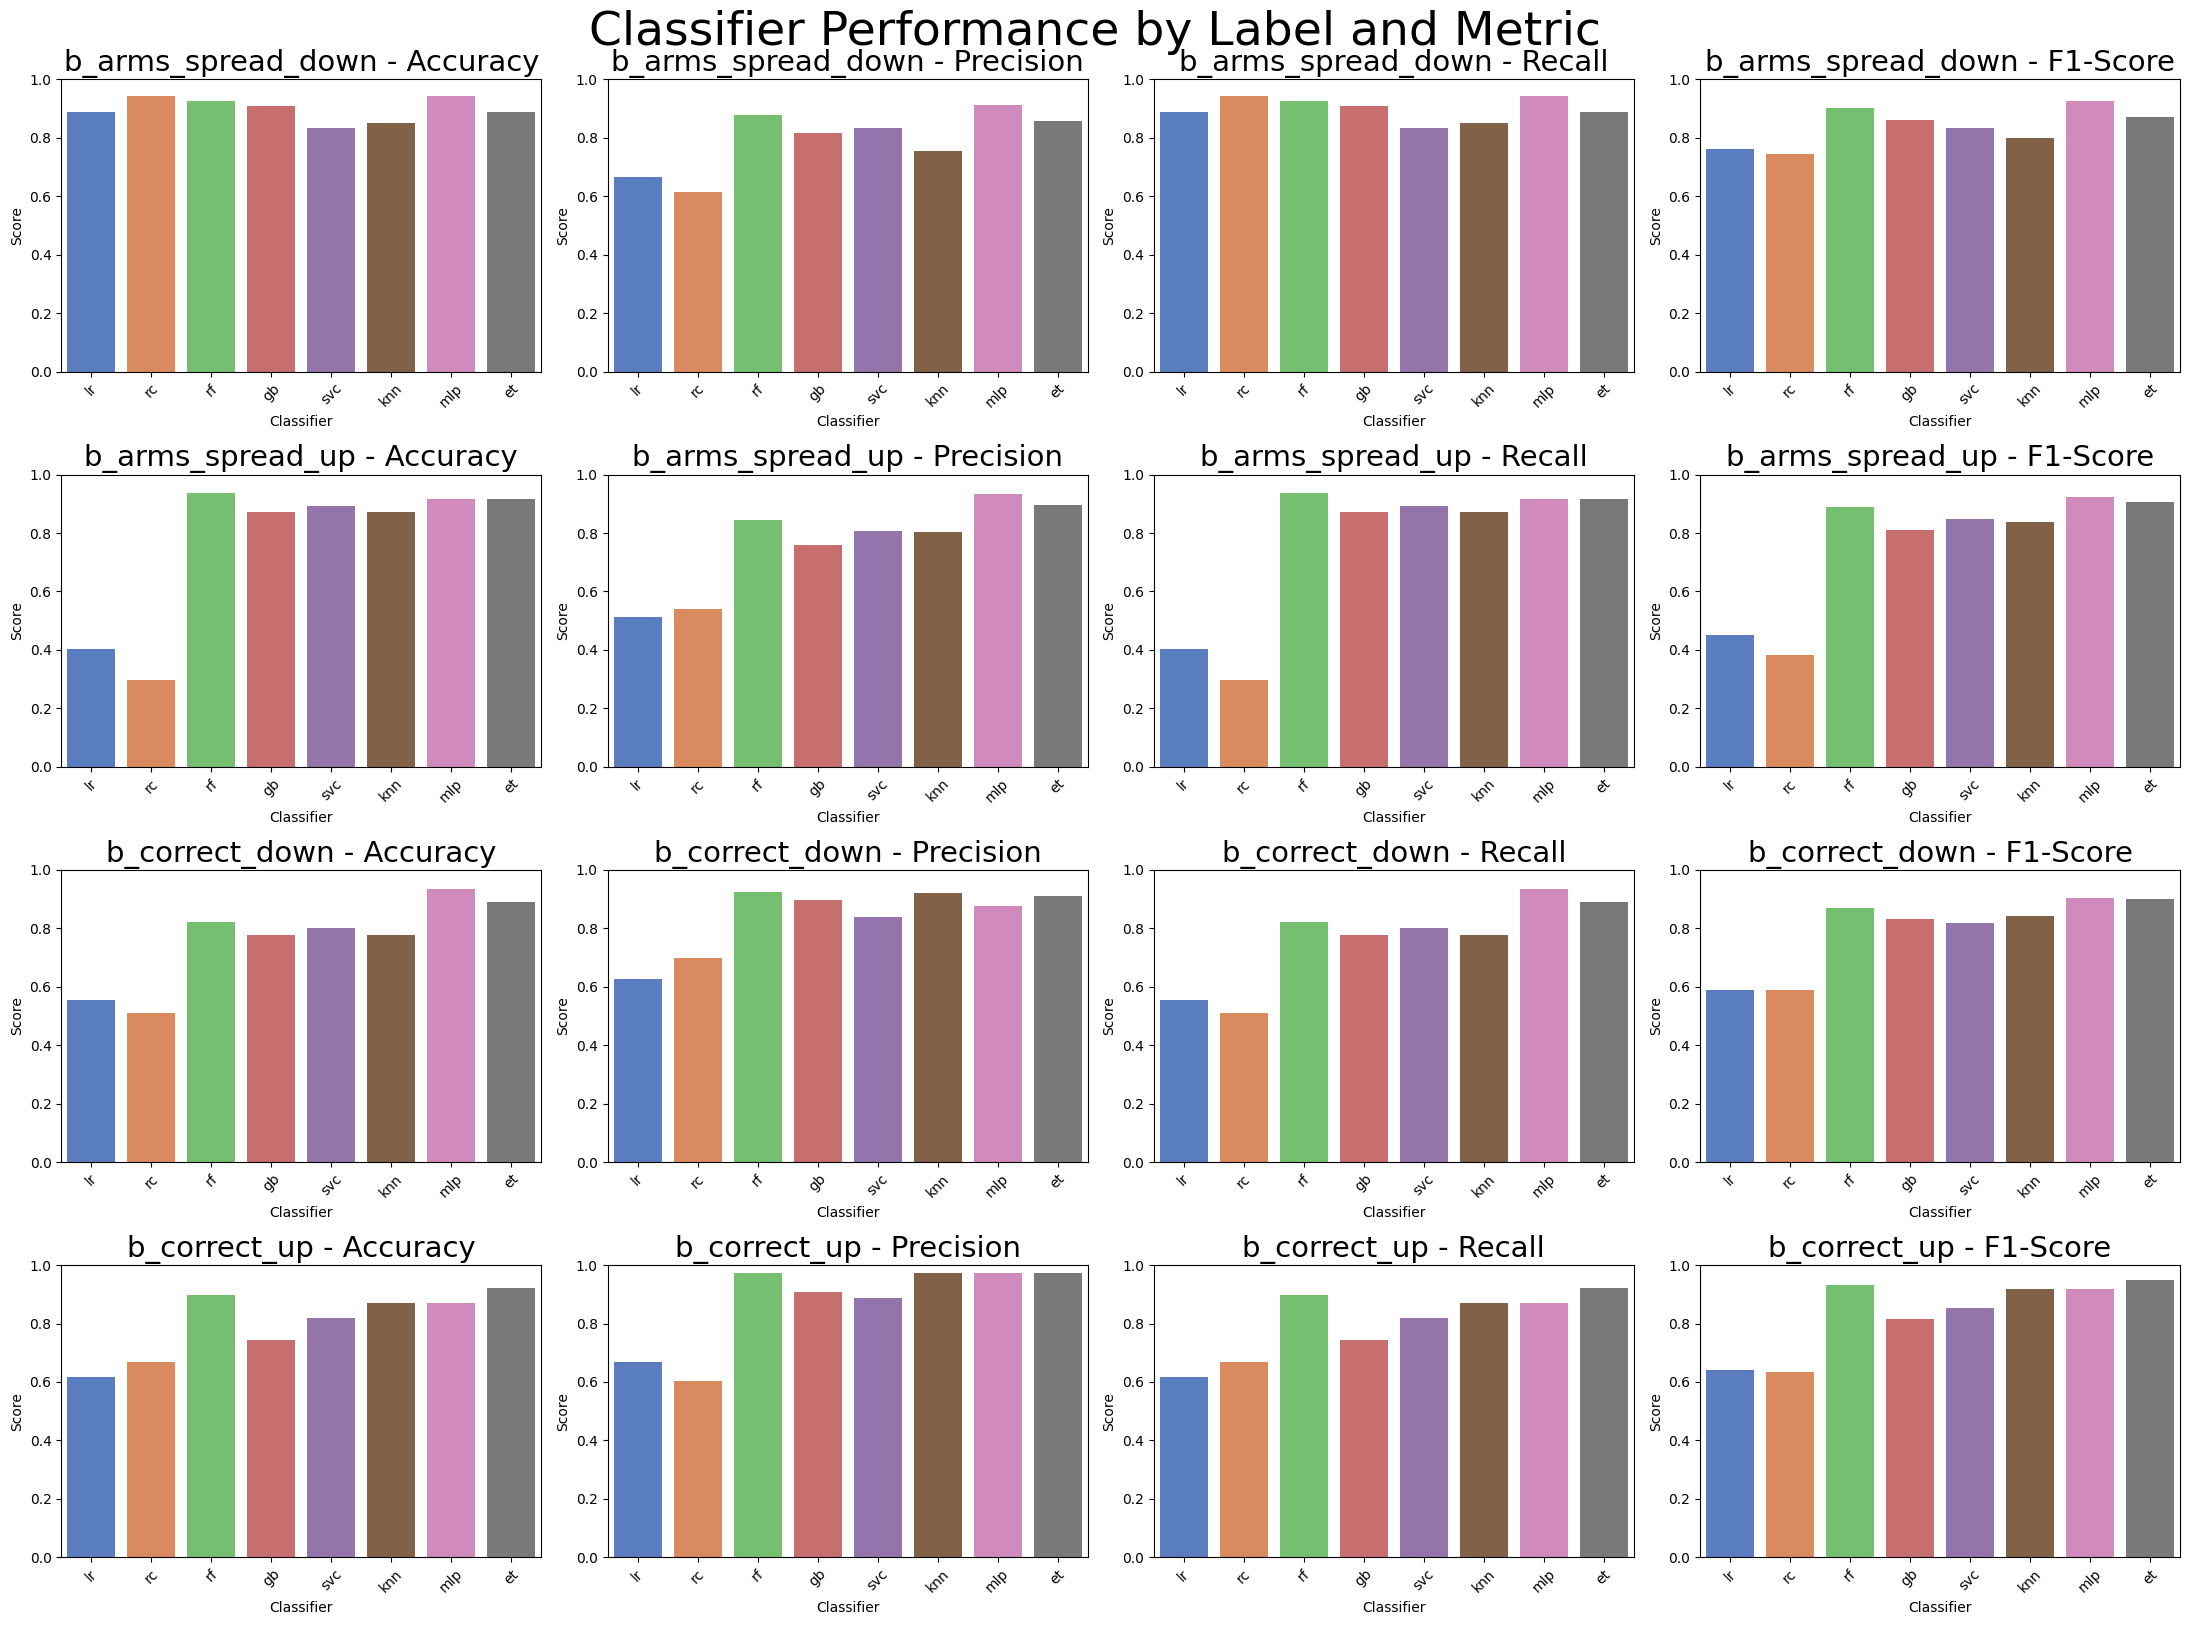

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Label and classifier names
labels = ['b_arms_spread_down', 'b_arms_spread_up', 'b_correct_down', 'b_correct_up']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
classifiers = list(predictions.keys())

# Store all data
records = []

# Compute metrics per label per classifier
for clf_name, y_pred in predictions.items():
    y_true = np.array(y_test)
    y_pred = np.array(y_pred)

    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=labels)

    for i, label in enumerate(labels):
        # Accuracy for the class: correct predictions / total true for that class
        true_mask = y_true == label
        acc = np.sum((y_pred == y_true) & true_mask) / np.sum(true_mask)

        records.append({'Label': label, 'Metric': 'Accuracy', 'Classifier': clf_name, 'Score': acc})
        records.append({'Label': label, 'Metric': 'Precision', 'Classifier': clf_name, 'Score': precision[i]})
        records.append({'Label': label, 'Metric': 'Recall', 'Classifier': clf_name, 'Score': recall[i]})
        records.append({'Label': label, 'Metric': 'F1-Score', 'Classifier': clf_name, 'Score': f1[i]})

# DataFrame for plotting
df_metrics = pd.DataFrame(records)

# Set up 4x4 subplot grid (labels x metrics)
fig, axes = plt.subplots(4, 4, figsize=(22, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot each label-metric combo
for row_idx, label in enumerate(labels):
    for col_idx, metric in enumerate(metrics):
        ax = axes[row_idx, col_idx]
        subset = df_metrics[(df_metrics['Label'] == label) & (df_metrics['Metric'] == metric)]

        sns.barplot(data=subset, x='Classifier', y='Score', ax=ax, palette='muted')
        ax.set_ylim(0, 1)
        ax.set_title(f'{label} - {metric}', fontsize=21)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Super title and layout
plt.suptitle('Classifier Performance by Label and Metric', fontsize=34, y=0.93)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


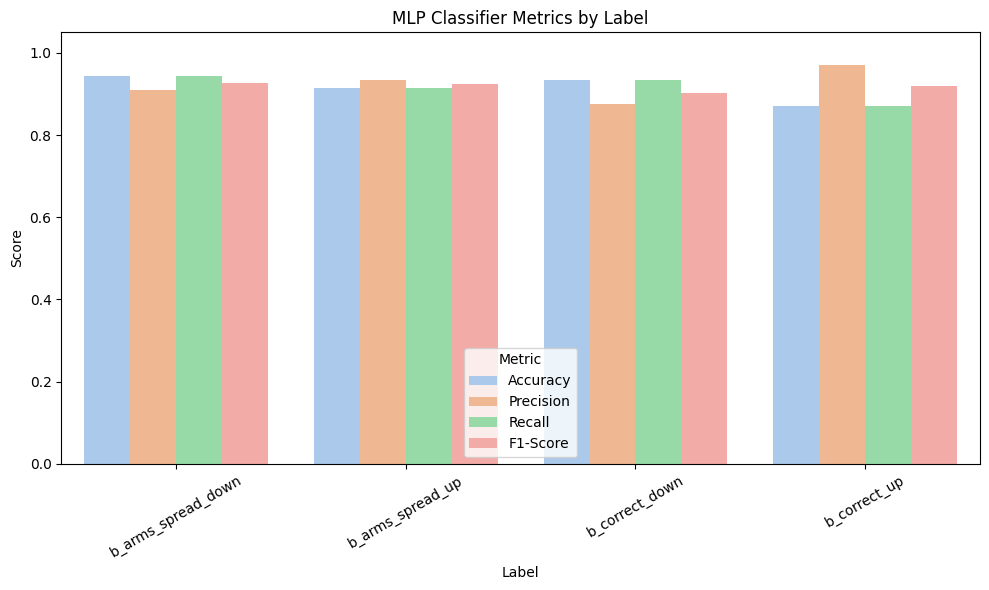

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Labels (in the correct order)
labels = ['b_arms_spread_down', 'b_arms_spread_up', 'b_correct_down', 'b_correct_up']

# Select predictions for MLP
mlp_name = 'mlp'
y_pred = predictions[mlp_name]
y_true = np.array(y_test)

# Compute precision, recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, labels=labels)

# Compute per-class accuracy
accuracy = []
for label in labels:
    correct = np.sum((y_pred == y_true) & (y_true == label))
    total = np.sum(y_true == label)
    acc = correct / total if total > 0 else 0
    accuracy.append(acc)

# Create metrics DataFrame
mlp_df = pd.DataFrame({
    'Label': labels,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Melt for Seaborn
mlp_melted = mlp_df.melt(id_vars='Label', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mlp_melted, x='Label', y='Score', hue='Metric', palette='pastel')
plt.title('MLP Classifier Metrics by Label')
plt.xticks(rotation=30)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


In [12]:
metrics = {
    'accuracy': {},
    'precision': {},
    'recall': {},
    'f1-score': {}
}

for algorithm, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics['accuracy'][algorithm] = accuracy
    metrics['precision'][algorithm] = precision
    metrics['recall'][algorithm] = recall
    metrics['f1-score'][algorithm] = f1

for metric, values in metrics.items():
    print(f'--- {metric} ---')
    for algorithm, score in values.items():
        print(f'{algorithm}: {score:.4f}')

--- accuracy ---
lr: 0.6270
rc: 0.6162
rf: 0.8973
gb: 0.8324
svc: 0.8378
knn: 0.8432
mlp: 0.9189
et: 0.9027
--- precision ---
lr: 0.6176
rc: 0.6132
rf: 0.9010
gb: 0.8406
svc: 0.8395
knn: 0.8532
mlp: 0.9209
et: 0.9040
--- recall ---
lr: 0.6270
rc: 0.6162
rf: 0.8973
gb: 0.8324
svc: 0.8378
knn: 0.8432
mlp: 0.9189
et: 0.9027
--- f1-score ---
lr: 0.6153
rc: 0.5919
rf: 0.8973
gb: 0.8321
svc: 0.8377
knn: 0.8450
mlp: 0.9190
et: 0.9031


In [13]:
import joblib

# Pick the mlp pipeline
mlp_pipe = fit_models['mlp']   # this includes StandardScaler + MLPClassifier

# OPTIONAL but highly recommended: keep feature order with the model
# If X_train is a DataFrame:
feature_names = list(X_train.columns)

bundle = {
    "model": mlp_pipe,
    "feature_names": feature_names,
}

joblib.dump(bundle, "bench_mlp_pipeline.pkl")
print("Saved MLP pipeline to bench_mlp_pipeline.pkl")


Saved MLP pipeline to bench_mlp_pipeline.pkl


=== MLP Performance on Test Set ===
Accuracy      : 0.919
Macro F1-score: 0.919
Weighted F1   : 0.919

Classification report:
                    precision    recall  f1-score   support

b_arms_spread_down       0.91      0.94      0.93        54
  b_arms_spread_up       0.93      0.91      0.92        47
    b_correct_down       0.88      0.93      0.90        45
      b_correct_up       0.97      0.87      0.92        39

          accuracy                           0.92       185
         macro avg       0.92      0.92      0.92       185
      weighted avg       0.92      0.92      0.92       185



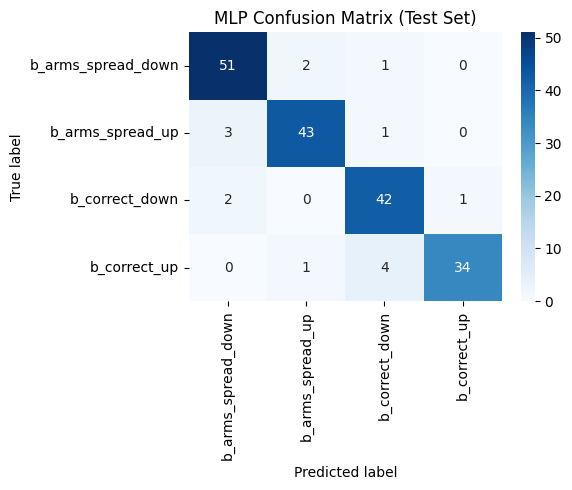

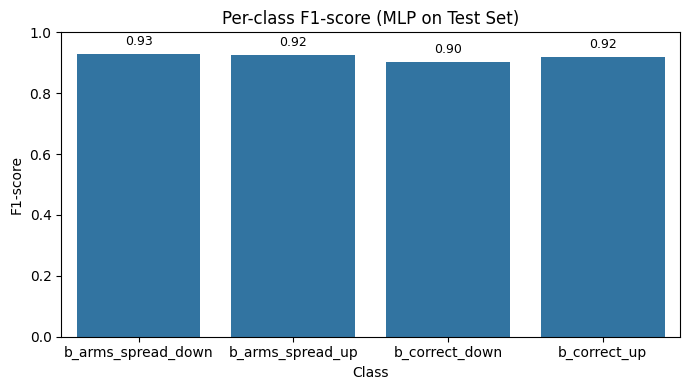


[Info] Skipping ROC / PR curves (need binary labels and predict_proba).


In [15]:
# ==========================================
# Evaluation + Pretty Plots for MLP
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score
)

# 1) Get model and predictions
mlp_pipe = fit_models['mlp']          # StandardScaler + MLPClassifier
y_pred   = mlp_pipe.predict(X_test)

# Try to get probabilities (not strictly needed but useful for curves)
y_proba = None
if hasattr(mlp_pipe, "predict_proba"):
    try:
        y_proba = mlp_pipe.predict_proba(X_test)
    except Exception:
        y_proba = None

# Classes
classes = np.unique(y_train)
class_names = [str(c) for c in classes]

# 2) Print scalar metrics
acc  = accuracy_score(y_test, y_pred)
f1m  = f1_score(y_test, y_pred, average="macro")
f1w  = f1_score(y_test, y_pred, average="weighted")

print("=== MLP Performance on Test Set ===")
print(f"Accuracy      : {acc:.3f}")
print(f"Macro F1-score: {f1m:.3f}")
print(f"Weighted F1   : {f1w:.3f}")
print()
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=class_names))


# 3) Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("MLP Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()


# 4) Per-class F1 bar chart
from sklearn.metrics import precision_recall_fscore_support

precisions, recalls, f1s, supports = precision_recall_fscore_support(
    y_test, y_pred, labels=classes, zero_division=0
)

plt.figure(figsize=(7, 4))
sns.barplot(x=class_names, y=f1s)
plt.ylim(0, 1.0)
plt.ylabel("F1-score")
plt.xlabel("Class")
plt.title("Per-class F1-score (MLP on Test Set)")
for i, v in enumerate(f1s):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()


# 5) ROC + Precision–Recall (for binary classification)
if y_proba is not None and len(classes) == 2:
    # Assume classes[1] is the "positive" class
    pos_class = classes[1]
    # get probability of positive class
    if isinstance(pos_class, str):
        pos_index = list(mlp_pipe.classes_).index(pos_class)
    else:
        pos_index = list(mlp_pipe.classes_).index(pos_class)
    y_scores = y_proba[:, pos_index]

    # ROC
    fpr, tpr, _ = roc_curve(y_test, y_scores, pos_label=pos_class)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"MLP (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], "k--", linewidth=1)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (MLP, Test Set)")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Precision–Recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores, pos_label=pos_class)
    ap = average_precision_score(y_test, y_scores, pos_label=pos_class)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f"MLP (AP = {ap:.3f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision–Recall Curve (MLP, Test Set)")
    plt.legend(loc="lower left")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("\n[Info] Skipping ROC / PR curves (need binary labels and predict_proba).")
